# coinEM Implementation
----------
Input : observation(*list of tuples(flips, heads)*), initial p_1, initial p_2 <br/>
Output : EM process logs

In [1]:
import math
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
class coinEM:
  def __init__(self, obs, p_1, p_2, verbose = False): #p_1 corresponds to prob(Head|A), p_2 corresponds to prob(Head|B)
    self.obs = obs
    self.p_1 = p_1
    self.p_2 = p_2
    self.p_history = [[p_1,p_2]]
    self.verbose = verbose

  def Binomial(self, flips, heads, prob):
    tails = flips-heads
    return (prob**heads)*((1-prob)**(tails))

  def EM(self, verbose):

    # E-step
    z_table = {'A':[[],[]], 'B':[[],[]]}
    for trial in self.obs:
      F, H = trial #F : Flips, T : Tails, H : Heads
      T = F-H
      prob_1 = self.Binomial(F, H, self.p_1)
      prob_2 = self.Binomial(F, H, self.p_2)
      obs_prob = [prob_1/ (prob_1+prob_2), prob_2/ (prob_1+prob_2)] 
      z_table['A'][0].append(obs_prob[0]*H)
      z_table['A'][1].append(obs_prob[0]*T)
      z_table['B'][0].append(obs_prob[1]*H)
      z_table['B'][1].append(obs_prob[1]*T)

    print(z_table)

    if verbose:
      print("-"*10)
      print("iterating observation datas")
      z_table_dict = {}

      for key, value in z_table.items():  
        z_table_dict[key+'_H'] = value[0]
        z_table_dict[key+'_T'] = value[1]

      z_table_df = pd.DataFrame(z_table_dict)
    
    # M-step
    self.p_1 = sum(z_table['A'][0]) / (sum(z_table['A'][0]) + sum(z_table['A'][1]))
    self.p_2 = sum(z_table['B'][0]) / (sum(z_table['B'][0]) + sum(z_table['B'][1]))
    self.p_history.append([self.p_1, self.p_2])

    if verbose:
      print("current params : probability")
      print(f"p_1 : {self.p_1} \t p_2  : {self.p_2}")


  def run(self):
    iters = 1
    while True:
      previous_p_1 = self.p_1
      previous_p_2 = self.p_2
      if self.verbose:
        print(f"iteration #{iters}")
      iters += 1
      self.EM(verbose = self.verbose)
      if abs(previous_p_1-self.p_1) < 0.0005 and abs(previous_p_2-self.p_2) < 0.0005:
        if self.verbose:
          print("-"*10)
          print("EM process is finished")
        break
    print(f"p_1 : {self.p_1} \t p_2  : {self.p_2}")
    
  def plot(self, ax, color):
    p1_log, p2_log = zip(*self.p_history)
    ax.scatter(p1_log, p2_log, c = color)

{'A': [[2.5000000000000018, 3.951219512195122, 0.0010667479427003972, 0.07317073170731717, 1.9999962366542352], [2.5000000000000018, 5.926829268292683, 0.0004571776897287417, 0.048780487804878106, 7.999984946616941]], 'B': [[2.4999999999999982, 0.04878048780487797, 6.9989332520573, 5.926829268292683, 3.7633457649188355e-06], [2.4999999999999982, 0.07317073170731694, 2.9995428223102714, 3.951219512195122, 1.5053383059675342e-05]]}
{'A': [[2.19969012041352, 2.8461189451333, 0.5165235927453844, 1.2006164259919037, 1.9210113407583507], [2.19969012041352, 4.26917841769995, 0.2213672540337362, 0.8004109506612691, 7.684045363033403]], 'B': [[2.8003098795864805, 1.1538810548667, 6.483476407254616, 4.799383574008097, 0.07898865924164931], [2.8003098795864805, 1.7308215823000501, 2.778632745966264, 3.199589049338731, 0.31595463696659726]]}
{'A': [[2.2079768653541154, 2.6464384340234948, 0.8018956214687737, 1.454081823751894, 1.8455704856309627], [2.2079768653541154, 3.9696576510352424, 0.3436695

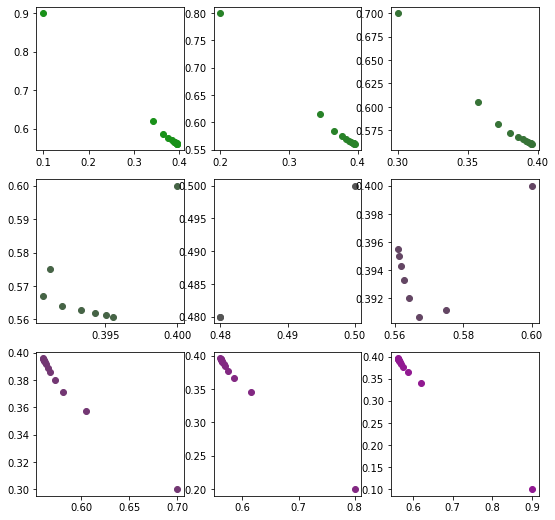

In [3]:
observation =  [(10,5), (10,4), (10,7), (10,6), (10,2)]
init_p1 = 0.4
init_p2 = 0.6
fig, ax = plt.subplots(3,3, figsize=(9,9))
for i in range(1,10):
  init_p1 = i/10
  init_p2 = 1-init_p1
  model = coinEM(observation, init_p1, init_p2, verbose = False)
  model.run()
  model.plot(ax[(i-1)//3][(i-1)%3], color = f"#{i}{10-i}{10-i}{i}{i}{10-i}")